In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt



n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=-1)

def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
    train_losses.append(loss.item())
    train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
    torch.save(network.state_dict(), '/home/sgillen/work_dir/ucsb/sgillen_research/misc/mnist/data/results/model.pth')
    torch.save(optimizer.state_dict(), './data/results/optimizer.pth')

def test():
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = network(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


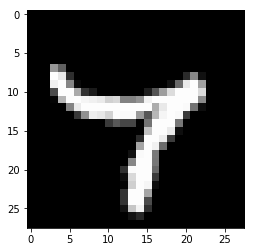

In [4]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./data/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
plt.imshow(example_data[0][0], cmap='gray', interpolation='none')

In [5]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [6]:
test()
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()

/home/sgillen/work_dir/ucsb/env/lib/python3.6/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3004, Accuracy: 751/10000 (7%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.327838
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.302082
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.303369
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.241829
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.264621
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.182935
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.117638
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.087862
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.086544
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.053921
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.982881
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.814939
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.870628
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.793782
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.487323
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.470563
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.496509
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.413994
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.486591
Train Epoch: 1 [12160/6

In [2]:
import os
os.getcwd()

'/home/sgillen/work_dir/ucsb/sgillen_research/misc/mnist'